### 分类测试

In [263]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np

knn=KNeighborsClassifier()
iris=load_iris()

X=iris.data
y=iris.target

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
# print(len(X_train))
# print(len(X_test))

knn.fit(X_train,y_train)
ypre= knn.predict(X_test)

# print(ypre)
# print(y_test)

s=accuracy_score(ypre,y_test)
print(s)
# knn.score(ypre,y_test)
# knn.predict()
# lens=np.arange(len(ypre))
# plt.figure()
# plt.plot(lens,ypre)
# plt.plot(lens,y_test)
# plt.show()

0.9555555555555556


### 回归测试

In [169]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

boston=load_boston()
X=boston.data
y=boston.target

X= preprocessing.minmax_scale(X)
y= preprocessing.minmax_scale(y)
knn=KNeighborsRegressor()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))


print(X_train,X_test)

# from sklearn.linear_model import LogisticRegression
# log=LogisticRegression()
# 
# log.fit(X_train,y_train)
# print(svc.score(X_test,y_test))

# plt.figure()
# plt.plot(X,y)
# plt.show()

0.7633963220776271
[[1.50089896e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.00000000e+00 4.03421634e-01]
 [6.69440040e-04 0.00000000e+00 7.33137830e-02 ... 5.53191489e-01
  9.96621110e-01 1.60871965e-01]
 [3.28088562e-04 2.50000000e-01 1.61290323e-01 ... 6.80851064e-01
  9.84215039e-01 1.59492274e-01]
 ...
 [6.50220052e-04 0.00000000e+00 2.01612903e-01 ... 7.02127660e-01
  1.00000000e+00 2.19370861e-01]
 [1.57855445e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  8.75737556e-02 5.37803532e-01]
 [1.05294061e-03 3.40000000e-01 2.06378299e-01 ... 3.72340426e-01
  9.83685511e-01 8.63686534e-02]] [[1.34256447e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  8.36577740e-01 2.86975717e-01]
 [1.98999931e-03 0.00000000e+00 1.00000000e+00 ... 7.97872340e-01
  8.66735589e-01 6.13686534e-01]
 [3.91256007e-04 2.50000000e-01 1.61290323e-01 ... 6.80851064e-01
  1.00000000e+00 9.82339956e-02]
 ...
 [8.15332110e-04 8.00000000e-01 1.64589443e-01 ... 7.02127660e-01
  1.00000000e

#### 数据测试

In [182]:
import pandas as pd
uci_data= pd.read_csv('/Users/yihui/Desktop/study/tmp/pythontest/UCI_Credit_Card.csv')
uci_data.info()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                  

#### Gridsearch demo

In [194]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
 
# Loading the Digits dataset
digits = datasets.load_digits()
 
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
 
# 将数据集分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
 
# 设置gridsearch的参数
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
 
#设置模型评估的方法.如果不清楚,可以参考上面的k-fold章节里面的超链接
scores = ['precision', 'recall']
 
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
 
    #构造这个GridSearch的分类器,5-fold
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    #只在训练集上面做k-fold,然后返回最优的模型参数
    clf.fit(X_train, y_train)
 
    print("Best parameters set found on development set:")
    print()
    #输出最优的模型参数
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    # for params, mean_score, scores in clf.grid_scores_:
    #     print("%0.3f (+/-%0.03f) for %r"
    #           % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    #在测试集上测试最优的模型的泛化能力.
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99     

#### 数据规范化

In [214]:
from sklearn import preprocessing
# 初始化数据，每一行表示一个样本，每一列表示一个特征
x = np.array([[ 0., -3., 1.], [ 3., 1., 2.], [ 0., 1., -1.]])
# x= np.array([[1,2,3],[4,2,-10]])
# 将数据进行[0,1]规范化
min_max_scaler = preprocessing.MinMaxScaler()
minmax_x = min_max_scaler.fit_transform(x)
print (minmax_x)


# 初始化数据
x = np.array([[ 0., -3., 1.], [ 3., 1., 2.], [ 0., 1., -1.]])
# 将数据进行Z-Score规范化
scaled_x = preprocessing.scale(x)
print()
print (scaled_x)

[[0.         0.         0.66666667]
 [1.         1.         1.        ]
 [0.         1.         0.        ]]

[[-0.70710678 -1.41421356  0.26726124]
 [ 1.41421356  0.70710678  1.06904497]
 [-0.70710678  0.70710678 -1.33630621]]


#### GridSearchCV demo

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
rf=RandomForestClassifier()
parameters = {"n_estimators": range(1,11)}
iris=load_iris()
clf=GridSearchCV(estimator=rf,param_grid=parameters)
clf.fit(iris.data,iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)

最优分数： 0.9667
最优参数： {'n_estimators': 7}


#### GridSearchCV demo2

In [246]:
# -*- coding: utf-8 -*-
# 使用RandomForest对IRIS数据集进行分类
# 利用GridSearchCV寻找最优参数,使用Pipeline进行流水作业
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
rf = RandomForestClassifier()
parameters = {"randomforestclassifier__n_estimators": range(1,11)}
iris = load_iris()
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('randomforestclassifier', rf)
])
# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)
# 对iris数据集进行分类
clf.fit(iris.data, iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)

最优分数： 0.9733
最优参数： {'randomforestclassifier__n_estimators': 3}


#### 主成分分析

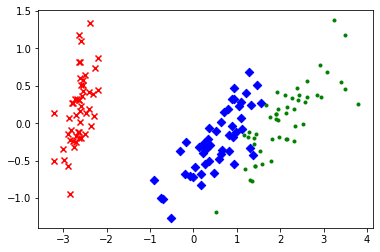

In [264]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets.base import load_iris

x,y=load_iris(return_X_y=True)
pca=dp.PCA(n_components=2)
reduced_x=pca.fit_transform(x)

# # print(x)
# # print(y)
# 
# print(reduced_x)

red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
for i in range(len(reduced_x)): #按鸢尾花的类别将降维后的数据点保存在不同的表表中
    if y[i]==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()

# print(y)

In [15]:
import requests
payload = {'key1': 'value1', 'key2': 'value2'}

r=requests.get("https://www.yiibai.com/pandas/python_pandas_quick_start.html",params={})
# print(r.text)

In [16]:
import pandas as pd
s=pd.Series([1,2,3,4,5])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [25]:
import pandas as pd
import numpy as np
dates = pd.date_range('20170101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df['B']
df

,A,B,C,D
2017-01-01,0.101236,-1.050974,-0.053228,0.390543
2017-01-02,-0.504220,0.291020,-1.262036,0.803415
2017-01-03,1.227048,-0.125399,2.196466,-0.893742
2017-01-04,-1.106113,0.700803,0.078109,-1.094260
2017-01-05,-0.531197,0.757300,0.289007,-0.371717
2017-01-06,0.230411,1.855394,0.625675,-0.697575


In [30]:
df[0:4]

,A,B,C,D
2017-01-01,0.101236,-1.050974,-0.053228,0.390543
2017-01-02,-0.504220,0.291020,-1.262036,0.803415
2017-01-03,1.227048,-0.125399,2.196466,-0.893742
2017-01-04,-1.106113,0.700803,0.078109,-1.094260


In [29]:
df['2017-01-01':'2017-01-02']

,A,B,C,D
2017-01-01,0.101236,-1.050974,-0.053228,0.390543
2017-01-02,-0.504220,0.291020,-1.262036,0.803415


In [34]:
df.loc['2017-01-02']

A   -0.504220
B    0.291020
C   -1.262036
D    0.803415
Name: 2017-01-02 00:00:00, dtype: float64

In [37]:
df.loc[:,['A','B']]

,A,B
2017-01-01,0.101236,-1.050974
2017-01-02,-0.504220,0.291020
2017-01-03,1.227048,-0.125399
2017-01-04,-1.106113,0.700803
2017-01-05,-0.531197,0.757300
2017-01-06,0.230411,1.855394


In [38]:
df.loc['2017-01-01':'2017-01-03	',['A','B']]

,A,B
2017-01-01,0.101236,-1.050974
2017-01-02,-0.504220,0.291020
2017-01-03,1.227048,-0.125399


In [43]:
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
df



,col1,col2,col3
0,1.680694,-1.806132,0.513123
1,1.141638,-2.180653,-1.304946
2,-1.853540,-0.855266,0.758200
3,0.839490,-0.814389,0.645570


In [44]:
for key,value in df.iteritems():
    print(key)
    print(value)

col1
0    1.680694
1    1.141638
2   -1.853540
3    0.839490
Name: col1, dtype: float64
col2
0   -1.806132
1   -2.180653
2   -0.855266
3   -0.814389
Name: col2, dtype: float64
col3
0    0.513123
1   -1.304946
2    0.758200
3    0.645570
Name: col3, dtype: float64


In [45]:
for rowindex,row in df.iterrows():
    print(rowindex)
    print(row)

0
col1    1.680694
col2   -1.806132
col3    0.513123
Name: 0, dtype: float64
1
col1    1.141638
col2   -2.180653
col3   -1.304946
Name: 1, dtype: float64
2
col1   -1.853540
col2   -0.855266
col3    0.758200
Name: 2, dtype: float64
3
col1    0.839490
col2   -0.814389
col3    0.645570
Name: 3, dtype: float64


In [47]:
unsorted_df = pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns = ['col2','col1'])

unsorted_df

,col2,col1
1,-0.346439,-0.611398
4,1.642944,0.356116
6,1.259837,-2.694949
2,0.318434,0.784214
3,0.767016,-0.061377
5,2.261371,-0.068105
9,-1.108588,-0.531852
8,-1.495247,0.482471
0,1.797813,1.632584
7,-0.105991,-0.361984


In [50]:
unsorted_df.sort_index(ascending=True)

,col2,col1
0,1.797813,1.632584
1,-0.346439,-0.611398
2,0.318434,0.784214
3,0.767016,-0.061377
4,1.642944,0.356116
5,2.261371,-0.068105
6,1.259837,-2.694949
7,-0.105991,-0.361984
8,-1.495247,0.482471
9,-1.108588,-0.531852


In [57]:
unsorted_df.sort_values(by='col1',ascending=True)

,col2,col1
6,1.259837,-2.694949
1,-0.346439,-0.611398
9,-1.108588,-0.531852
7,-0.105991,-0.361984
5,2.261371,-0.068105
3,0.767016,-0.061377
4,1.642944,0.356116
8,-1.495247,0.482471
2,0.318434,0.784214
0,1.797813,1.632584


In [58]:
s = pd.Series(['Tom', 'William Rick', 'John', 'Alber@t', np.nan, '1234','SteveMinsu'])
s


0             Tom
1    William Rick
2            John
3         Alber@t
4             NaN
5            1234
6      SteveMinsu
dtype: object

In [67]:
s.str.len()

0     3.0
1    12.0
2     4.0
3     7.0
4     NaN
5     4.0
6    10.0
dtype: float64

In [69]:
df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
a,0.293832,0.109301,1.129323,0.575019
b,-0.698401,1.412235,0.049022,-0.967939
c,-2.269376,-0.137546,0.265365,0.446062
d,1.769327,-0.381091,0.044821,-0.263832
e,-0.276023,-0.859901,-1.005622,-0.506125
f,0.346787,-0.871609,-0.240664,0.104726
g,0.462825,0.430470,-0.177842,0.029003
h,-1.849621,0.707873,-0.255600,0.064249


In [70]:
df.loc[:,'A']

a    0.293832
b   -0.698401
c   -2.269376
d    1.769327
e   -0.276023
f    0.346787
g    0.462825
h   -1.849621
Name: A, dtype: float64

In [82]:
df.loc[['a','b','c'],['A','B']]

,A,B
a,0.293832,0.109301
b,-0.698401,1.412235
c,-2.269376,-0.137546


In [89]:
df.loc['a':'c']

,A,B,C,D
a,0.293832,0.109301,1.129323,0.575019
b,-0.698401,1.412235,0.049022,-0.967939
c,-2.269376,-0.137546,0.265365,0.446062


In [94]:
df.loc[:,"A"]>0

a     True
b    False
c    False
d     True
e    False
f     True
g     True
h    False
Name: A, dtype: bool

In [98]:
df.iloc[:3]

,A,B,C,D
a,0.293832,0.109301,1.129323,0.575019
b,-0.698401,1.412235,0.049022,-0.967939
c,-2.269376,-0.137546,0.265365,0.446062


In [102]:
df.iloc[1:5,2:4]

,C,D
b,0.049022,-0.967939
c,0.265365,0.446062
d,0.044821,-0.263832
e,-1.005622,-0.506125


In [103]:
df.A

a    0.293832
b   -0.698401
c   -2.269376
d    1.769327
e   -0.276023
f    0.346787
g    0.462825
h   -1.849621
Name: A, dtype: float64

In [104]:
df['A']

a    0.293832
b   -0.698401
c   -2.269376
d    1.769327
e   -0.276023
f    0.346787
g    0.462825
h   -1.849621
Name: A, dtype: float64

In [106]:
df

,A,B,C,D
a,0.293832,0.109301,1.129323,0.575019
b,-0.698401,1.412235,0.049022,-0.967939
c,-2.269376,-0.137546,0.265365,0.446062
d,1.769327,-0.381091,0.044821,-0.263832
e,-0.276023,-0.859901,-1.005622,-0.506125
f,0.346787,-0.871609,-0.240664,0.104726
g,0.462825,0.430470,-0.177842,0.029003
h,-1.849621,0.707873,-0.255600,0.064249


In [107]:
df.pct_change()

,A,B,C,D
a,NaN,NaN,NaN,NaN
b,-3.376871,11.920566,-0.956592,-2.683315
c,2.249386,-1.097396,4.413226,-1.460837
d,-1.779654,1.770634,-0.831096,-1.591470
e,-1.156004,1.256420,-23.436336,0.918361
f,-2.256371,0.013616,-0.760682,-1.206918
g,0.334608,-1.493879,-0.261036,-0.723058
h,-4.996372,0.644419,0.437230,1.215240


In [108]:
s = pd.Series([1,2,3,4,5,4])
s



0    1
1    2
2    3
3    4
4    5
5    4
dtype: int64

In [109]:
s.pct_change()

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64

In [123]:
s1 = pd.Series(np.array([1,2,3,4,5]))
s2 = pd.Series(np.array([10,20,30,40,50]))
s1


0    1
1    2
2    3
3    4
4    5
dtype: int64

In [121]:
s2

0    10
1    20
2    30
3   -10
4    50
dtype: int64

In [119]:
s1.cov(s2)

12.5

In [124]:
s1.corr(s2)

1.0

In [125]:
df = pd.DataFrame(np.random.randn(10, 4),
index = pd.date_range('1/1/2020', periods=10),
columns = ['A', 'B', 'C', 'D'])
df


,A,B,C,D
2020-01-01,0.471592,1.325205,0.529549,0.991105
2020-01-02,-0.584409,-0.289026,1.301284,-1.205745
2020-01-03,-0.754926,0.663468,0.459144,-0.548913
2020-01-04,-1.198365,-1.232402,-1.703695,0.390808
2020-01-05,-1.080149,-1.911493,0.892893,-0.603515
2020-01-06,0.184204,1.304071,0.776905,-0.569705
2020-01-07,0.996186,0.921650,-1.131237,-2.400211
2020-01-08,-2.021597,-0.518464,0.299173,1.147645
2020-01-09,0.011932,0.264253,-1.723865,-0.134665
2020-01-10,0.335468,-1.994718,-0.414732,0.654241


In [126]:
df.rolling(window=3).mean()

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.289248,0.566549,0.763325,-0.254518
2020-01-04,-0.845900,-0.285987,0.018911,-0.454617
2020-01-05,-1.011147,-0.826809,-0.117220,-0.253873
2020-01-06,-0.698103,-0.613274,-0.011299,-0.260804
2020-01-07,0.033414,0.104743,0.179520,-1.191143
2020-01-08,-0.280402,0.569086,-0.018386,-0.607423
2020-01-09,-0.337826,0.222480,-0.851976,-0.462410
2020-01-10,-0.558066,-0.749643,-0.613141,0.555740


In [127]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df



,one,two,three
a,-1.360976,0.296078,0.396949
b,NaN,NaN,NaN
c,-0.645408,-0.470924,-1.471645
d,NaN,NaN,NaN
e,-0.462099,-1.103915,0.578016
f,-0.239213,0.932147,-0.705145
g,NaN,NaN,NaN
h,0.867033,1.974435,-0.935390


In [128]:
df['one'].isnull()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [129]:
df['one'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [131]:
df['one'].sum()

-1.8406626312277212

In [141]:
df

,one,two,three
a,-1.360976,0.296078,0.396949
b,NaN,NaN,NaN
c,-0.645408,-0.470924,-1.471645
d,NaN,NaN,NaN
e,-0.462099,-1.103915,0.578016
f,-0.239213,0.932147,-0.705145
g,NaN,NaN,NaN
h,0.867033,1.974435,-0.935390


In [142]:
df.dropna()

,one,two,three
a,-1.360976,0.296078,0.396949
c,-0.645408,-0.470924,-1.471645
e,-0.462099,-1.103915,0.578016
f,-0.239213,0.932147,-0.705145
h,0.867033,1.974435,-0.935390


In [145]:
df

,one,two,three
a,-1.360976,0.296078,0.396949
b,NaN,NaN,NaN
c,-0.645408,-0.470924,-1.471645
d,NaN,NaN,NaN
e,-0.462099,-1.103915,0.578016
f,-0.239213,0.932147,-0.705145
g,NaN,NaN,NaN
h,0.867033,1.974435,-0.935390


In [150]:
df['one'].fillna('bbb')

a    -1.36098
b         bbb
c   -0.645408
d         bbb
e   -0.462099
f   -0.239213
g         bbb
h    0.867033
Name: one, dtype: object

In [154]:
df['one']=df['one'].fillna(0.3)

In [155]:
df

,one,two,three
a,-1.360976,0.296078,0.396949
b,0.300000,NaN,NaN
c,-0.645408,-0.470924,-1.471645
d,0.300000,NaN,NaN
e,-0.462099,-1.103915,0.578016
f,-0.239213,0.932147,-0.705145
g,0.300000,NaN,NaN
h,0.867033,1.974435,-0.935390


In [157]:
print (df.fillna(method='backfill'))


one       two     three
a -1.360976  0.296078  0.396949
b  0.300000 -0.470924 -1.471645
c -0.645408 -0.470924 -1.471645
d  0.300000 -1.103915  0.578016
e -0.462099 -1.103915  0.578016
f -0.239213  0.932147 -0.705145
g  0.300000  1.974435 -0.935390
h  0.867033  1.974435 -0.935390


In [158]:
import pandas as pd
import pymysql
db = pymysql.connect('mysql-backup.dian.so','yihui','GMYAvsgzE9fRRC1r','oss_view') # 打开数据库连接
user=pd.read_sql("select * from agent_employee",con=db)
print(user)
db.close()

id       mobile  agent_id  department_id  name nick_name  sex  \
0          0  18800000000         1         1162.0  系统用户      系统用户  1.0   
1          1  18857133137         1          516.0   唐永波        谷鬼  1.0   
2          2  18667127792         1          516.0   黄巧玲        小虎  1.0   
3          3  18069445953         1          516.0   袁新梅        书颖  2.0   
4          4  18768475006         1         3176.0   李向东        智通  1.0   
...      ...          ...       ...            ...   ...       ...  ...   
23218  23915  18570660926         1         3202.0    袁静        玄心  2.0   
23219  23916  13270265789         1          981.0   张后超        南途  1.0   
23220  23917  15057879397         1         2671.0   柳新伟        根宝  1.0   
23221  23918  15888283380         1         2258.0   李敏乐        敏叻  1.0   
23222  23919  17693104145       275          909.0   杨永光      None  NaN   

               id_card_no               email employee_no  ... employee_type  \
0                   11111    

In [176]:
user.loc[1:10,['id','name']]

,id,name
1,1,唐永波
2,2,黄巧玲
3,3,袁新梅
4,4,李向东
5,5,莫笛
6,6,陈章
7,7,王泽
8,8,姜金晶
9,9,丁玉林
10,10,蒋程伟


In [177]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)


In [178]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [207]:
a=df.groupby('Team').groups
a

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}

In [218]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

df


,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [225]:
a=df.groupby('Year').groups
type(a)

dict

In [226]:
a

{2014: Int64Index([0, 2, 4, 9], dtype='int64'),
 2015: Int64Index([1, 3, 5, 10], dtype='int64'),
 2016: Int64Index([6, 8], dtype='int64'),
 2017: Int64Index([7, 11], dtype='int64')}

In [228]:
s = pd.Series(["a","b","c","a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

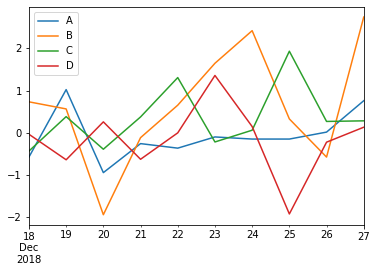

In [232]:
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('2018/12/18',periods=10), columns=list('ABCD'))
df.plot()

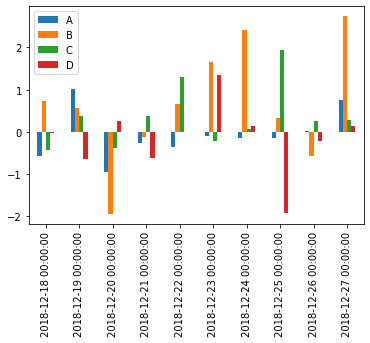

In [233]:
df.plot.bar()

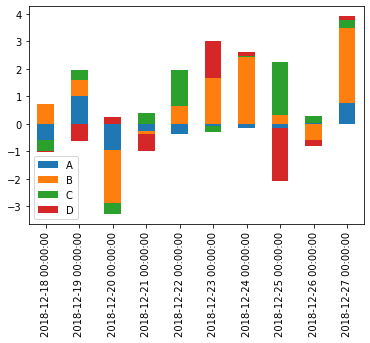

In [234]:
df.plot.bar(stacked=True)